# MatPlotLib bevezetés
A Matplotlib nevű csomag talán a legáltalánosabban használt diagram készítő megoldás Python-hoz.
Telepítése a következő paranncsel történhet:
> pip install matplotlib

## 1. Importálás és egyszerű plot készítés 
A matplotlib csomag pyplot modulja jó kiindulás lehet képek készítéséhez, azt a következő módon szokás importálni:

In [1]:
import matplotlib.pyplot as plt
# same as:
# from matplotlib import pyplot as plt

A legegyszerűbb plot amit készíthetünk a `plt.plot()` függvénny egyszerű meghívásával.

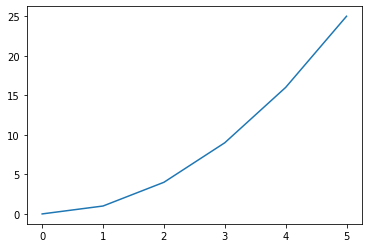

In [2]:
xData = [0,1,2,3,4,5]
yData = [0,1,4,9,16,25]
plt.plot(xData, yData)
plt.show()

In [3]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

Ugyan ez Jupyter notebookin kívül is működik.
Ott egy interaktív ablakot kapunk, amiben pl lehet zoomolni, és a beállított nézetet akár el is menthetjük.

### Több adatsorral és némi formázással:
Ha több adatsort szeretnénk rátenni ugyanarra a diagramra, a legegyszerűbb a `plt.plot()` függvényt többször meghívni. Ez egymás után pakolja rá a diagramra a görbéket. Külön formázást és címkét is adhatunk minden új görbénkhez. A jelmagyarázatot `a plt.legend()` paranccsal kapcsoljuk be.

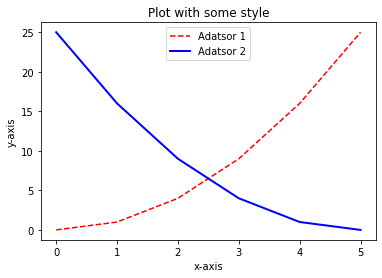

In [4]:
plt.plot(xData, yData, label = 'Adatsor 1', color = 'red', linestyle = '--')
plt.plot(xData, yData[::-1], label = 'Adatsor 2', color = 'blue', linewidth = 2)

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Plot with some style')
plt.legend()
plt.show()

### Sub-plotok
Leggyorsabban így készíthetünk sub-plotokat, de ezeknek az átláthatóbb használatáról később lesz szó.

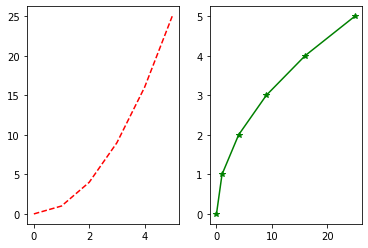

In [5]:
# plt.subplot(sorokSzáma, OszlopokSzáma, plotSzáma)
plt.subplot(1,2,1)
plt.plot(xData, yData, 'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(yData, xData, 'g*-');

## 2. Hogyan épül fel egy plot?

Mielőtt rátérünk a konkrét plot-típusok és beállításaik megismerésére, szerintem hasznos megérteni, hogy hogyan is épül fel egy maplotlib-ben készült diagram. A fogalmakat sokszor angolul fogom használni részben az egyszerűség kedvéért, részben pedig mert így fogtok tudni rákeresni.

A 2 fő fogalom amit használni fogunk:
 * Figure
 * Axes (subplots)
 
Ezek kifejezetten akkor kerülnek elő, ha az "objektum orientált" módon készítjük a plotokat, amit én mindenképpen ajánlok. A fenti példákban az egyszerűbb verziót használtam, a plt.plot() függvény meghívásával, de ez a módszer inkább csak gyors megjelenítéshez ajánlott.

### Objektum orientált plottolás
1. Figure létrehozása - "üres rajzlap"
2. Axes (tengelypár) hozzáadása
3. Plottolás: itt már a tengelyekre!!

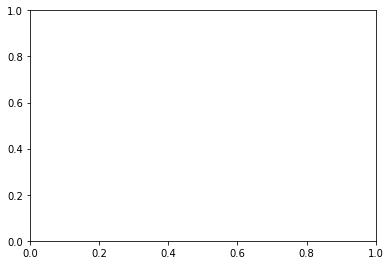

In [6]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

Text(0.5, 1.0, 'My Title')

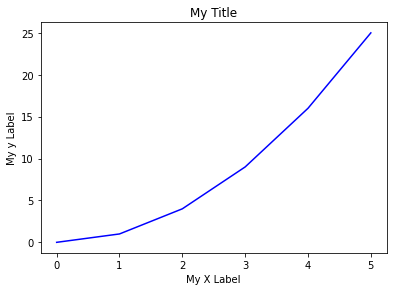

In [7]:
# Create Figure (empty canvas)
fig = plt.figure()
# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
# Plot on that set of axes
axes.plot(xData, yData, color='b')
axes.set_xlabel('My X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('My y Label')
axes.set_title('My Title')

Egy Figure objektumra több tengelypár is adható, ezek akár átfedésben is lehetnek.

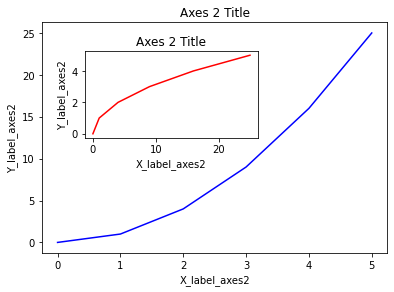

In [8]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(xData, yData, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2
axes2.plot(yData, xData, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

### Subplots
A tengelypárok manulis létrahozása nagy szabadságot ad, de nem a legkényelmesebb, és általában nincs is szükség erre a szabadsága.
Az esetek nagy részében vagy egy plotot szeretnénk, vagy szépen egymás mellé rendezett subplotokat. Ezekre találták ki a `plt.subplots()` fügvényt.

Meghívásakor egyszerre tér vissza a figure objektummal, illetve a tengelypárral, vagy azok listájával.
    
    fig, ax = plt.subplots()
    fig, axes = plt.subplots(2,2)

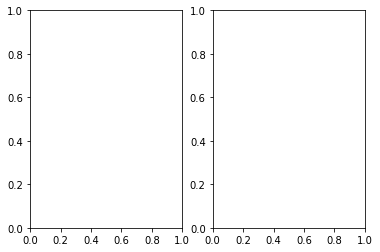

In [9]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

In [10]:
axes  # axes is an array of axes to plot on

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

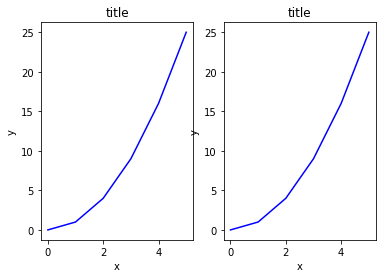

In [11]:
# Iterate on the axes and add curve
for ax in axes:
    ax.plot(xData, yData, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# Display the figure object    
fig

Gyakori hiba az automatikusan létrhozott subplotoknák, hogy a feliratok és a tengelyek átfedésban vannak. Ennek a problémának a kezelésésre van saját matplotlib függvény, amit a plot létrhozásának a végén érdemes kiadni:

    plt.tight_layout()
    
Ezzel minden felirat és axes úgy lesz igazítva, hogy ne legyen átfedések, de jól kitöltse a rendelkezésre álló területet.

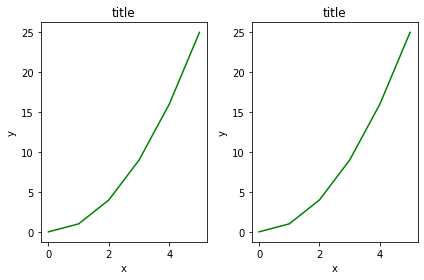

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(xData, yData, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
plt.tight_layout()

### Képméret és felbontás
A figure létrehozásakor sok más egyéb beállítás is megadható, amik a help-ből könnyen megérthetőek, itt csak egy pár fontosabbat mutatok meg.
A defualt értékek az alábbi módon alakulnak:
    
    plt.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)
    
    plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    
A `plt.figure()` függvénynél a **figsize** és a **dpi** opciókat emelném ki, a `plt.subplots()`-nál pedig látszik, hogy a összes figure keyword elfogadott(fig_kw), ehhez jönnek hozzá a rá speciálisan jellemzők, például a **nrows, ncols, sharex** és **sharey**.


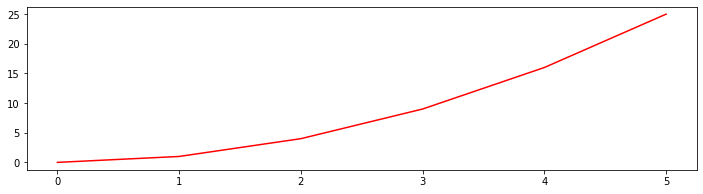

In [13]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(xData, yData, 'r')

In [14]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

## 3. Plotok egyszerű formázása

Azt már láttuk, hogy hogyan kell adatokat elhelyezni egy egyszerű ploton, de nézzünk meg néhány fontos formázási beállítást is.

### Feliratok
Szinte minden plotról elengedhetetlen az alábbi három információ:
 * Cím
 * Tengelyfeliratok
 * Jelmagyarázat

In [15]:
import numpy as np
x = np.linspace(0, 5, 11)

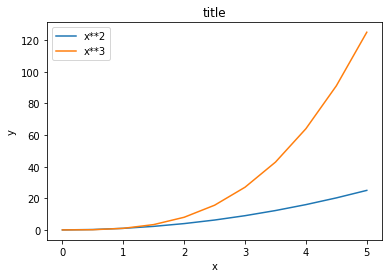

In [16]:
fig, ax = plt.subplots()

# Add data with labels
ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")

# Set title
ax.set_title("title")

# Set axis labels
ax.set_xlabel("x")
ax.set_ylabel("y")

# Visualize legends
ax.legend()

A jelmagarázat pozícióját automatikusan megróbálja úgy elhelyezni, hogy a lehető legkevesebb adatot takarjon ki, de az felül is írhtó a *loc* paraméterrel:

    ax.legend(loc="lower left")
    
A *loc* paraméter lehetséges értékei:

    'best'
    'upper right'
    'upper left'
    'lower left'
    'lower right'
    'right'
    'center left'
    'center right'
    'lower center'
    'upper center'
    'center'

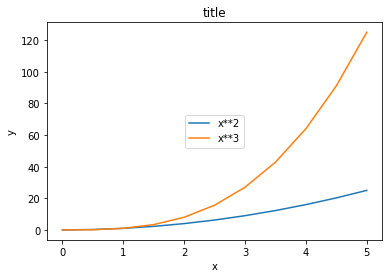

In [17]:
fig, ax = plt.subplots()

# Add data with labels
ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")

# Set title
ax.set_title("title");

# Set axis labels
ax.set_xlabel("x")
ax.set_ylabel("y");

# Visualize legends
ax.legend(loc="center")

### Színek és stílusok
Ha valaki sokat használta a MATLAB-ot, akkor az onnan ismerős fomázási stílus is használható, de a jobb olvashatóság érdekében érdemes rendesen kiírni a formázási paramétereket.

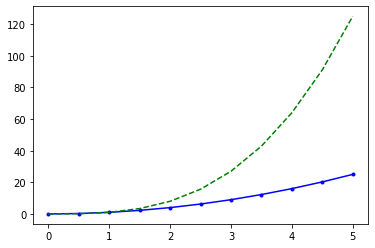

In [18]:
# MATLAB style line color and style 
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

Az alábbi ploton sok fomázás látható egyszerre:
 * linewidth (lw)
 * color (c)
 * linestyle (ls)
 * marker (m)
 
 Ezek kombinációjából elég jól elkülönülő görbék állíthatók be.

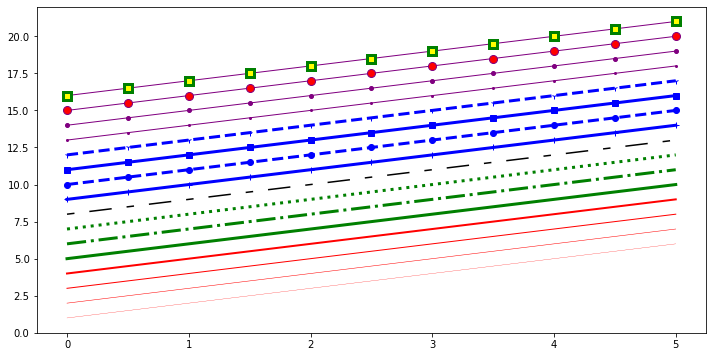

In [19]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="#0000FF", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="#0000FF", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="#0000FF", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="#0000FF", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

### Plot range

Az eredmények megjelenítésekor sokszor fontos ráközelíteni a görbe egy adott szakaszára. Ezt a tengelyek range-einek beállításával érhetjük el: `ax.set_ylim()` és `ax.set_xlim()` függvényekkel.

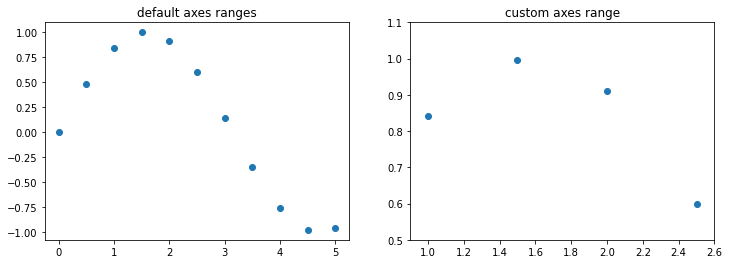

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].scatter(x, np.sin(x))
axes[0].set_title("default axes ranges")

axes[1].scatter(x, np.sin(x))
axes[1].set_ylim([0.5, 1.1])
axes[1].set_xlim([0.9, 2.6])
axes[1].set_title("custom axes range");

## 4. Plotok mentése
Az elkészített plotot termésteresen az esetlek nagy részében valahol máshol szeretnénk megmutatni, például egy jelentésben, ezért ezeket érdemes elmenteni. Az itt használt függvény:
    
    fig.savefig()

In [21]:
fig.savefig('myPicture.png')

In [22]:
fig.savefig("myPicture_HiRes.png", dpi=500) # quality can be set here as well

## Áttetintés

![title](src/anatomy1.webp)

## Egy kis emlékeztető
https://github.com/matplotlib/cheatsheets#cheatsheets